In [4]:
import pandas as pd
df=pd.read_csv(r"C:\Users\elabi\OneDrive\Desktop\Assurance maladie\data\raw\assurance-maladie.csv")

In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [6]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [8]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [9]:
df['age'].count()

np.int64(1338)

In [ ]:
for col in df:
    print(df[col].dtype)

In [12]:
df["age"].mean()

np.float64(39.20702541106129)

In [13]:
df["age"].median()

np.float64(39.0)

In [14]:
df["age"].std()

np.float64(14.049960379216154)

In [15]:
df["sex"].value_counts()

sex
male      676
female    662
Name: count, dtype: int64

In [ ]:
df["sex"].value_counts(normalize=True)*100

(sex
 male      50.523169
 female    49.476831
 Name: proportion, dtype: float64,
 '%')

In [20]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [22]:
df[df.duplicated()]

,age,sex,bmi,children,smoker,region,charges
581,19,male,30.59,0,no,northwest,1639.5631


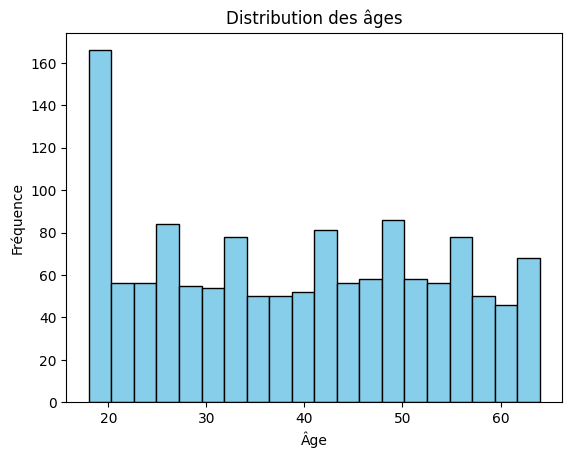

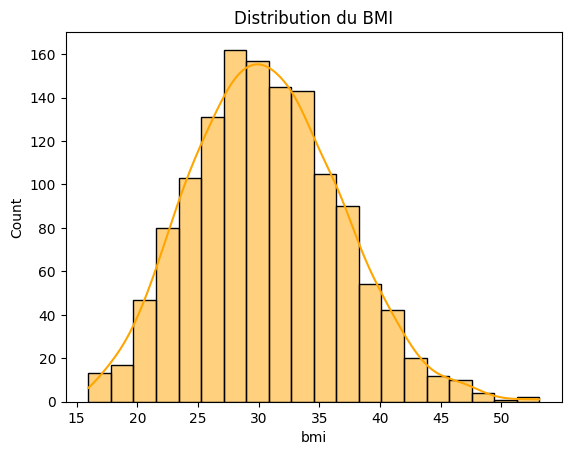

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histogramme avec Matplotlib
plt.hist(df["age"], bins=20, color="skyblue", edgecolor="black")
plt.title("Distribution des âges")
plt.xlabel("Âge")
plt.ylabel("Fréquence")
plt.show()

sns.histplot(df["bmi"], bins=20, kde=True, color="orange")
plt.title("Distribution du BMI")
plt.show()

In [46]:
import numpy as np
num_col=df.select_dtypes(include=np.number).columns
df.isna().sum()
for col in num_col:
    median = df[col].median()
    df[col] = df[col].fillna(median) 
df.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [47]:
import numpy as np

cat_cols = df.select_dtypes(include='object').columns

print(df[cat_cols].isna().sum())

for col in cat_cols:
    mode = df[col].mode()[0] 
    df[col] = df[col].fillna(mode)

print(df[cat_cols].isna().sum())

sex       0
smoker    0
region    0
dtype: int64
sex       0
smoker    0
region    0
dtype: int64
